# **Anslysis of hateful \#china tweets in the year of 2021**

_Author: [Jinghua Xu](https://jinhxu.github.io/)_

Following the burst of a global pandemic and Donald Trump's "Chinese Virus" tweet, the internet started to be filled with anti-china hateful speech. 

This research collects all tweets posted in the year of 2021 hashtagged \#china (excl. retweets/reply/quotes, approx. 0.93 million tweets). 

Three high-performance (pre-trained language model based) hate detection classifiers with different types of sensitivity (Covid-hate, women/immigrant, race/religion/gender/sexual orientation/misc.) were employed to detect hate in order to ensure wide coverage of various types of hate:

* [COVID-HATE dataset trained BERT model](https://arxiv.org/pdf/2005.12423.pdf)
* [SemEval-2019 hate dataset trained RoBERTa models](https://huggingface.co/cardiffnlp/twitter-roberta-base-hate)
* [HateXplain data trained BERT model](https://arxiv.org/abs/2012.10289)

If a tweet is identified as hateful by any of the classifiers, the tweet is then considered hateful in this preliminary research.


In [52]:
! pip install emoji

## Load Data

In [53]:
import pandas as pd
from collections import Counter

In [54]:
df = pd.read_csv('2021.csv', lineterminator='\n')

In [55]:
df

,Unnamed: 0,author id,created_at,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,CARDIFFNLP_ROBERTA_PREDS,hateXplain_PREDS,COVID_HATE_BERT_PREDS,date
0,0,49919826,2021-12-31 23:58:03+00:00,1477066552839004160,en,0,0,0,0,Instagram,Happy new year! \n#china #beijing #winter #eve...,0,1,0,2021-12-31
1,1,38971530,2021-12-31 23:57:59+00:00,1477066538331086860,en,0,0,0,0,Paper.li,The latest The Political Science Daily! https:...,0,1,0,2021-12-31
2,2,58010461,2021-12-31 23:57:37+00:00,1477066442705195008,en,0,0,0,0,Twitter Web App,Do you support this? Use your purchasing power...,0,1,0,2021-12-31
3,3,1465236285526880260,2021-12-31 23:57:03+00:00,1477066301612957699,en,0,1,0,0,Twitter for Android,Thoughts?\n\n@beverleyturner @MaajidNawaz\n@Un...,0,1,0,2021-12-31
4,4,783046681,2021-12-31 23:56:45+00:00,1477066228028133380,en,1,0,2,1,Twitter Web App,#Putin Tells #Biden &amp; #EU Cut #NATO Crap &...,0,1,0,2021-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935993,217826,14189166,2021-01-01 00:02:48+00:00,1344796177447985153,en,0,0,1,0,Twitter for iPhone,So...why are we supposed to be upset about for...,0,1,0,2021-01-01
935994,217827,1069362780464193536,2021-01-01 00:02:20+00:00,1344796059747426305,en,5,0,0,3,Twitter for Android,Emma Alam competed and won 29th World Memory C...,0,1,0,2021-01-01
935995,217828,2251770488,2021-01-01 00:02:01+00:00,1344795980475076613,en,1,0,0,0,Oz History,"Today, in 1851 - #Melbourne�s #China Town was ...",0,1,0,2021-01-01
935996,217829,814490080815579136,2021-01-01 00:01:16+00:00,1344795793644007425,en,1,0,0,0,Hootsuite Inc.,China orders Alibaba founder Jack Ma to pare d...,0,1,0,2021-01-01


## Predictions Overview (by each model)

In [56]:
Counter(df['COVID_HATE_BERT_PREDS'])

Counter({0: 922806, 1: 2177, 2: 11015})

In [57]:
'Percentage of hateful #china tweets identified by COVID-HATE-BERT in 2021: {:.1%}'.format(11015/935998)

'Percentage of hateful #china tweets identified by COVID-HATE-BERT in 2021: 1.2%'

In [58]:
Counter(df['CARDIFFNLP_ROBERTA_PREDS'])

Counter({0: 932174, 1: 3824})

In [59]:
'Percentage of hateful #china tweets identified by CARDIFFNLP-HATE-BASE-ROBERTA in 2021: {:.1%}'.format(3824/935998)

'Percentage of hateful #china tweets identified by CARDIFFNLP-HATE-BASE-ROBERTA in 2021: 0.4%'

The BERT-HATEXPLAIN classifier detects not only hatefulness but also offensiveness, a larger proportion of tweets were identified as offensive than hateful. Among the three classifiers, it is the most conservative on hatefulness detection by identifying the smallest number of hateful tweets.

In [60]:
Counter(df['hateXplain_PREDS'])

Counter({0: 4185, 1: 924071, 2: 7742})

In [61]:
'Percentage of hateful #china tweets identified by BERT-HATEXPLAIN in 2021: {:.1%}'.format(4185/935998)

'Percentage of hateful #china tweets identified by BERT-HATEXPLAIN in 2021: 0.4%'

In [62]:
'Percentage of offensive #china tweets identified by BERT-HATEXPLAIN in 2021: {:.1%}'.format(7742/935998)

'Percentage of offensive #china tweets identified by BERT-HATEXPLAIN in 2021: 0.8%'

## Get binary predictions

In [63]:
len_df = len(df)
COVID_HATE_BERT_PREDS_bin = []
hateXplain_PREDS_bin = []

for i in range(len_df):
  if df['COVID_HATE_BERT_PREDS'][i] == 2:
    COVID_HATE_BERT_PREDS_bin.append(1)
  else:
    COVID_HATE_BERT_PREDS_bin.append(0)
  
  if df['hateXplain_PREDS'][i] == 0:
    hateXplain_PREDS_bin.append(1)
  else:
    hateXplain_PREDS_bin.append(0)

df['COVID_HATE_BERT_PREDS_bin'] = COVID_HATE_BERT_PREDS_bin
df['hateXplain_PREDS_bin'] = hateXplain_PREDS_bin

In [64]:
df

,Unnamed: 0,author id,created_at,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,CARDIFFNLP_ROBERTA_PREDS,hateXplain_PREDS,COVID_HATE_BERT_PREDS,date,COVID_HATE_BERT_PREDS_bin,hateXplain_PREDS_bin
0,0,49919826,2021-12-31 23:58:03+00:00,1477066552839004160,en,0,0,0,0,Instagram,Happy new year! \n#china #beijing #winter #eve...,0,1,0,2021-12-31,0,0
1,1,38971530,2021-12-31 23:57:59+00:00,1477066538331086860,en,0,0,0,0,Paper.li,The latest The Political Science Daily! https:...,0,1,0,2021-12-31,0,0
2,2,58010461,2021-12-31 23:57:37+00:00,1477066442705195008,en,0,0,0,0,Twitter Web App,Do you support this? Use your purchasing power...,0,1,0,2021-12-31,0,0
3,3,1465236285526880260,2021-12-31 23:57:03+00:00,1477066301612957699,en,0,1,0,0,Twitter for Android,Thoughts?\n\n@beverleyturner @MaajidNawaz\n@Un...,0,1,0,2021-12-31,0,0
4,4,783046681,2021-12-31 23:56:45+00:00,1477066228028133380,en,1,0,2,1,Twitter Web App,#Putin Tells #Biden &amp; #EU Cut #NATO Crap &...,0,1,0,2021-12-31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935993,217826,14189166,2021-01-01 00:02:48+00:00,1344796177447985153,en,0,0,1,0,Twitter for iPhone,So...why are we supposed to be upset about for...,0,1,0,2021-01-01,0,0
935994,217827,1069362780464193536,2021-01-01 00:02:20+00:00,1344796059747426305,en,5,0,0,3,Twitter for Android,Emma Alam competed and won 29th World Memory C...,0,1,0,2021-01-01,0,0
935995,217828,2251770488,2021-01-01 00:02:01+00:00,1344795980475076613,en,1,0,0,0,Oz History,"Today, in 1851 - #Melbourne�s #China Town was ...",0,1,0,2021-01-01,0,0
935996,217829,814490080815579136,2021-01-01 00:01:16+00:00,1344795793644007425,en,1,0,0,0,Hootsuite Inc.,China orders Alibaba founder Jack Ma to pare d...,0,1,0,2021-01-01,0,0


## Equal-vote voting system

In [65]:
voting_results = []

for i in range(len_df):

  votes = []
  votes.append(df['COVID_HATE_BERT_PREDS_bin'][i])
  votes.append(df['CARDIFFNLP_ROBERTA_PREDS'][i])
  votes.append(df['hateXplain_PREDS_bin'][i])

  voting_results.append(max(set(votes), key = votes.count))

Counter(voting_results)

Counter({0: 934924, 1: 1074})

In [66]:
df['voting_results'] = voting_results

In [67]:
'Percentage of hateful #china tweets identified by voting system in 2021: {:.1%}'.format(len(df[df['voting_results']==1])/len(df))

'Percentage of hateful #china tweets identified by voting system in 2021: 0.1%'

## Inter-agreement on hatefulness between models

In [68]:
len(df[(df['COVID_HATE_BERT_PREDS_bin']==1) & (df['CARDIFFNLP_ROBERTA_PREDS']==1) & (df['hateXplain_PREDS_bin']==1)])

78

In [69]:
len(df[(df['COVID_HATE_BERT_PREDS_bin']==1) | (df['CARDIFFNLP_ROBERTA_PREDS']==1) | (df['hateXplain_PREDS_bin']==1)])

17872

In [70]:
len(df[(df['COVID_HATE_BERT_PREDS_bin']==1) & (df['hateXplain_PREDS_bin']==1)])

383

In [71]:
len(df[(df['COVID_HATE_BERT_PREDS_bin']==1) & ((df['CARDIFFNLP_ROBERTA_PREDS']==1))])

660

In [72]:
len(df[(df['CARDIFFNLP_ROBERTA_PREDS']==1) & (df['hateXplain_PREDS_bin']==1)])


187

In [73]:
# df1 = df[((df['COVID_HATE_BERT_PREDS_bin']==1) & ((df['CARDIFFNLP_ROBERTA_PREDS']==1)) | ((df['hateXplain_PREDS_bin']==1) & (df['COVID_HATE_BERT_PREDS_bin']==1)) | (df['COVID_HATE_BERT_PREDS_bin']==1))]
# len(df1)/len(df)

In [74]:
# df1 = df[(df['COVID_HATE_BERT_PREDS_bin']==1) | ((df['CARDIFFNLP_ROBERTA_PREDS']==1) & (df['hateXplain_PREDS_bin']==1))]
# len(df1)/len(df)

## OR label

A tweet identified as hateful by any of the classifiers gets a positive label.

In [75]:
OR_hate = []

for i in range(len_df):
  if df['COVID_HATE_BERT_PREDS_bin'][i] == 1 or df['CARDIFFNLP_ROBERTA_PREDS'][i] == 1 or df['hateXplain_PREDS_bin'][i] == 1:
    OR_hate.append(1)
  else:
    OR_hate.append(0)

Counter(OR_hate)

Counter({0: 918126, 1: 17872})

In [76]:
df['OR_hate'] = OR_hate

In [77]:
'Hate percentage in #china tweets (2021): {:.1%}'.format(17872/935998)

'Hate percentage in #china tweets (2021): 1.9%'

In [78]:
df

,Unnamed: 0,author id,created_at,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,CARDIFFNLP_ROBERTA_PREDS,hateXplain_PREDS,COVID_HATE_BERT_PREDS,date,COVID_HATE_BERT_PREDS_bin,hateXplain_PREDS_bin,voting_results,OR_hate
0,0,49919826,2021-12-31 23:58:03+00:00,1477066552839004160,en,0,0,0,0,Instagram,Happy new year! \n#china #beijing #winter #eve...,0,1,0,2021-12-31,0,0,0,0
1,1,38971530,2021-12-31 23:57:59+00:00,1477066538331086860,en,0,0,0,0,Paper.li,The latest The Political Science Daily! https:...,0,1,0,2021-12-31,0,0,0,0
2,2,58010461,2021-12-31 23:57:37+00:00,1477066442705195008,en,0,0,0,0,Twitter Web App,Do you support this? Use your purchasing power...,0,1,0,2021-12-31,0,0,0,0
3,3,1465236285526880260,2021-12-31 23:57:03+00:00,1477066301612957699,en,0,1,0,0,Twitter for Android,Thoughts?\n\n@beverleyturner @MaajidNawaz\n@Un...,0,1,0,2021-12-31,0,0,0,0
4,4,783046681,2021-12-31 23:56:45+00:00,1477066228028133380,en,1,0,2,1,Twitter Web App,#Putin Tells #Biden &amp; #EU Cut #NATO Crap &...,0,1,0,2021-12-31,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935993,217826,14189166,2021-01-01 00:02:48+00:00,1344796177447985153,en,0,0,1,0,Twitter for iPhone,So...why are we supposed to be upset about for...,0,1,0,2021-01-01,0,0,0,0
935994,217827,1069362780464193536,2021-01-01 00:02:20+00:00,1344796059747426305,en,5,0,0,3,Twitter for Android,Emma Alam competed and won 29th World Memory C...,0,1,0,2021-01-01,0,0,0,0
935995,217828,2251770488,2021-01-01 00:02:01+00:00,1344795980475076613,en,1,0,0,0,Oz History,"Today, in 1851 - #Melbourne�s #China Town was ...",0,1,0,2021-01-01,0,0,0,0
935996,217829,814490080815579136,2021-01-01 00:01:16+00:00,1344795793644007425,en,1,0,0,0,Hootsuite Inc.,China orders Alibaba founder Jack Ma to pare d...,0,1,0,2021-01-01,0,0,0,0


## Keywords examination

In [79]:
# preprocess tweets
# source: https://github.com/pysentimiento/pysentimiento/blob/master/pysentimiento/preprocessing.py

import emoji
import re

extra_args = {
    "vinai/bertweet-base":  {
        "user_token": "@USER",
        "url_token": "HTTPURL",
    }
}



special_tokens = ["@usuario", "url", "hashtag", "emoji"]


user_regex = re.compile(r"@[a-zA-Z0-9_]{0,15}")
url_regex = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
)

hashtag_regex = re.compile(r'\B#(\w*[a-zA-Z]+\w*)')
start_of_camel = re.compile(r'([A-Z]+)')

def camel_to_human(s, lower=True):
    """
    Converts camel case to 'human' case
    Arguments:
    ----------
    lower: bool (default: False)
        Convert output to lower
    """

    ret = start_of_camel.sub(r' \1', s).strip()

    if lower:
        ret = ret.lower()

    return ret

emoji_regex = re.compile(r"\|([^\|]+)\|")

def convert_emoji_to_text(x, emoji_wrapper="[EMOJI]"):
    """
    """
    return f" {emoji_wrapper} " + " ".join(x.groups()[0].split("_")) + f" {emoji_wrapper} "


replacements = {
    "~": None,
    "£": None,
    "¥": None,
    "¨": '"',
    "©": None,
    "«": '"',
    "°": None,
    "´": None,
    "¶": None,
    "·": None,
    "º": None,
    "»": '"',
    "×": None,
    "ا": None,
    "–": None,
    "—": None,
    "‘": None,
    "’": None,
    "“": '"',
    "”": '"',
    "•": None,
    "…": None,
    "‼": "!",
    "€": "$",
    "™": None,
    "●": None,
    "☠": None,
    "☹": None,
    "☺": None,
    "☻": "😃",
    "♀": None,
    "♂": None,
    "♡": "❤️",
    "♥": "❤️",
    "⚰": None,
    "⛱": None,
    "⛹": None,
    "✈": None,
    "✓": None,
    "❤": None,
    "ー": None,
    "🕯": None,
    "🛰": None,
}

laughter_conf = {
    "es": {
        "regex": re.compile("[ja][ja]+aj[ja]+"),
        "replacement": "jaja",
    },
    "en": {
        "regex": re.compile("[ha][ha]+ah[ha]+"),
        "replacement": "haha",
    }
}



def preprocess_tweet(
    text, lang="es", user_token="@usuario", url_token="url", preprocess_hashtags=True, hashtag_token=None,
    demoji=True, shorten=3, normalize_laughter=True, emoji_wrapper="emoji"):
    """
    Basic preprocessing
    Arguments:
    ---------
    text: str
        Text to preprocess
    lang: str (default 'es')
        Language used in the preprocessing. This is used for the demoji functionality and laughter preprocessing
    user_token: str (default "[USER]")
        Token used to replace user handles
    url_token: str (default "[URL]")
        Token used to replace urls
    preprocess_hashtags: boolean (default True)
        If true, applies preprocessing to hashtag, trying to split camel cases
    hashtag_token: str (default None)
        If preprocess_hashtags is True, adds hashtag_token before the preprocessed content of the hashtag
    shorten: int (default: 3)
        If not none, all occurrences of shorten or more characters are cut to this number
    demoji: boolean (default True)
        If true, converts emoji to text representations using `emoji` library, and wraps this with "[EMOJI]" strings
    normalize_laughter: boolean (default True)
        Normalizes laughters. Uses different regular expressions depending on the lang argument.
    """
    if lang == "en" and user_token == "@usuario":
        """
        If it is english and we didn't set any defaults, we set the vinai/bertweet-base defaults
        """
        user_token = "@USER"
        url_token = "HTTPURL"


    ret = ""
    for char in text:
        if char in replacements:
            replacement = replacements[char]
            if replacement:
                ret += replacement
        else:
            ret += char
    text = ret

    text = user_regex.sub(user_token, text)
    text = url_regex.sub(url_token, text)

    if shorten:
        repeated_regex = re.compile(r"(.)"+ r"\1" * (shorten-1) + "+")
        text = repeated_regex.sub(r"\1"*shorten, text)

    if demoji:
        text = emoji.demojize(text, language=lang, delimiters=("|", "|"))
        text = emoji_regex.sub(
            lambda x: convert_emoji_to_text(x, emoji_wrapper=emoji_wrapper),
            text
        )

    if normalize_laughter:
        laughter_regex = laughter_conf[lang]["regex"]
        replacement = laughter_conf[lang]["replacement"]

        text = laughter_regex.sub(
            replacement,
            text
        )

    def process_hashtags(x):
        """
        Hashtag preprocessing function
        Take first group and decamelize
        """


        text = x.groups()[0]

        text = camel_to_human(text)

        if hashtag_token:
            text = hashtag_token + " " + text

        return text

    if preprocess_hashtags:
        text = hashtag_regex.sub(
            process_hashtags,
            text
        )

    return text.strip()

### Word Clouds of hateful tweets identified by all models.

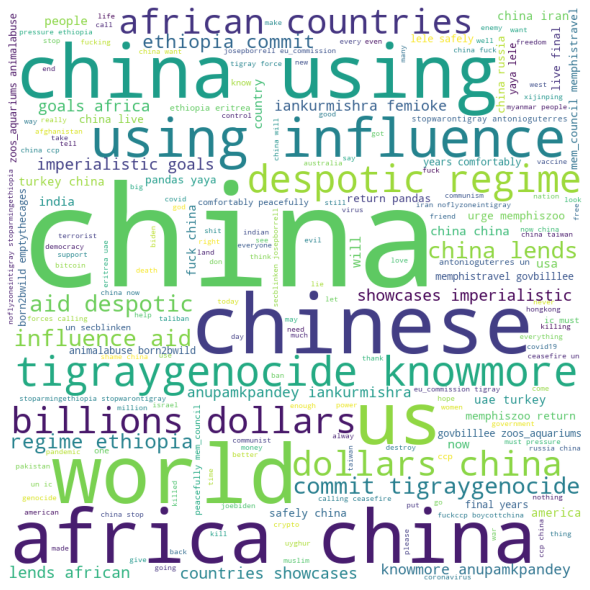

In [80]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
words = ''
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('co')
stopwords.add('amp')

pos_tweets = df[df['OR_hate']==1].tweet

# iterate through the csv file
for pos_tweet in pos_tweets:
     
    # typecaste each val to string
    pos_tweet = str(pos_tweet)

    # preprocess
    pos_tweets = preprocess_tweet(pos_tweet, lang='en')

    # split the value
    tokens = pos_tweet.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('hate_wordclouds_2021.png')

### Word Clouds of hateful tweets identified by COVID-HATE-BERT model.

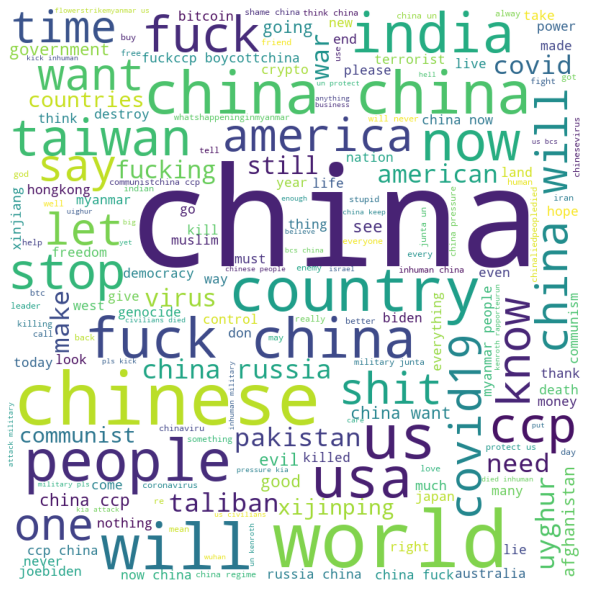

In [81]:
words = ''
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('co')
stopwords.add('amp')

pos_tweets = df[df['COVID_HATE_BERT_PREDS_bin']==1].tweet

# iterate through the csv file
for pos_tweet in pos_tweets:
     
    # typecaste each val to string
    pos_tweet = str(pos_tweet)

    # preprocess
    pos_tweets = preprocess_tweet(pos_tweet, lang='en')

    # split the value
    tokens = pos_tweet.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('hate_covid_hate_wordclouds.png')

### Word Clouds of hateful tweets identified by cardiffnlp-roberta model.

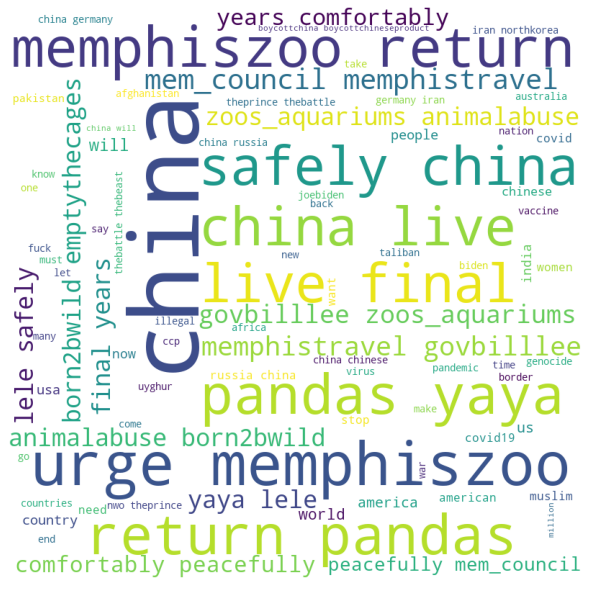

In [82]:
words = ''
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('co')
stopwords.add('amp')

pos_tweets = df[df['CARDIFFNLP_ROBERTA_PREDS']==1].tweet

# iterate through the csv file
for pos_tweet in pos_tweets:
     
    # typecaste each val to string
    pos_tweet = str(pos_tweet)

    # preprocess
    pos_tweets = preprocess_tweet(pos_tweet, lang='en')

    # split the value
    tokens = pos_tweet.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('hate_cardiffnlp_wordclouds.png')

### Word Clouds of hateful tweets identified HateXplain model.

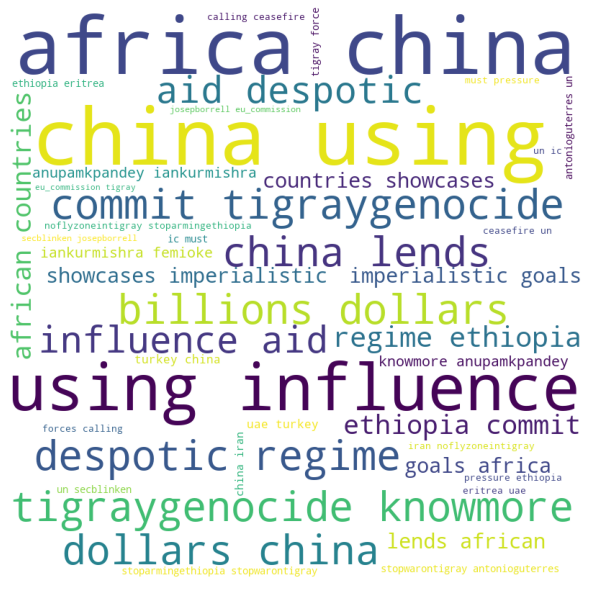

In [83]:
words = ''
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('co')
stopwords.add('amp')

pos_tweets = df[df['hateXplain_PREDS_bin']==1].tweet

# iterate through the csv file
for pos_tweet in pos_tweets:
     
    # typecaste each val to string
    pos_tweet = str(pos_tweet)

    # preprocess
    pos_tweets = preprocess_tweet(pos_tweet, lang='en')

    # split the value
    tokens = pos_tweet.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('hate_hateXplain_wordclouds.png')

### Word Clouds of offensive tweets identified by HateXplain model.

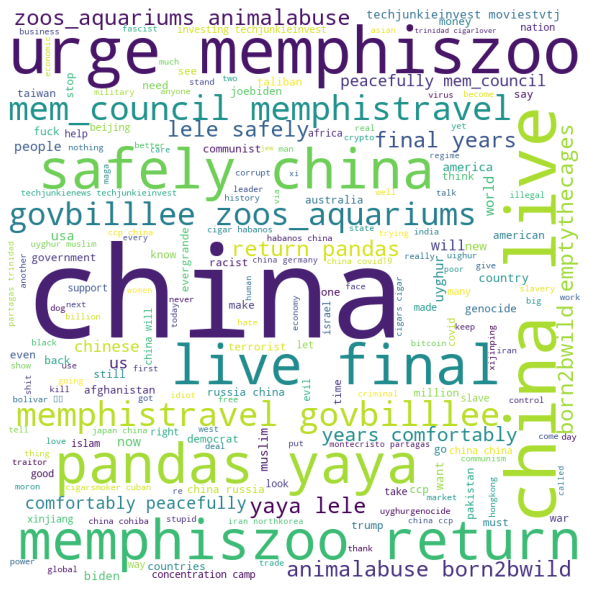

In [84]:
words = ''
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('co')
stopwords.add('amp')

pos_tweets = df[df['hateXplain_PREDS']==2].tweet

# iterate through the csv file
for pos_tweet in pos_tweets:
     
    # typecaste each val to string
    pos_tweet = str(pos_tweet)

    # preprocess
    pos_tweets = preprocess_tweet(pos_tweet, lang='en')

    # split the value
    tokens = pos_tweet.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.savefig('offense_hateXplain_wordclouds.png')

## Data Visualization

In [85]:
dates = []
for date in df['date'][::-1]:
  if date not in dates:
    dates.append(date)

In [86]:
num_tweets = []
num_hate_tweets_COVID_BERT = []
num_hate_tweets_CARDIFFNLP_ROBERTA = []
num_hate_tweets_HATEXPLAIN = []
num_hate_tweets_HATEXPLAIN_OFFENSE = []
num_hate_tweets = []

for date in dates:
  num_tweets.append(len(df[df['date']==date]))
  num_hate_tweets_COVID_BERT.append(len(df[(df['COVID_HATE_BERT_PREDS_bin']==1) & (df['date']==date)]))
  num_hate_tweets_CARDIFFNLP_ROBERTA.append(len(df[(df['CARDIFFNLP_ROBERTA_PREDS']==1) & (df['date']==date)]))
  num_hate_tweets_HATEXPLAIN.append(len(df[(df['hateXplain_PREDS_bin']==1) & (df['date']==date)]))
  num_hate_tweets_HATEXPLAIN_OFFENSE.append(len(df[(df['hateXplain_PREDS']==2) & (df['date']==date)]))
  num_hate_tweets.append(len(df[(df['OR_hate']==1) & (df['date']==date)]))

### Number/percentage of (non-/hateful) \#china tweets per day in the year of 2021

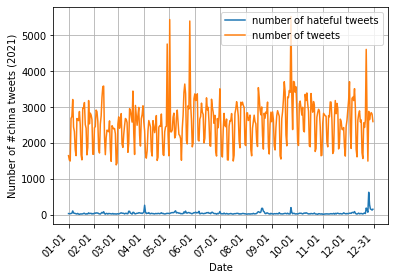

In [124]:
x_ticks = [0, 31, 59, 90, 120, 151, 181, 182+30, 182+31+30, 182+30+31+30, 182+31+31+30+30, 182+31+31+30+30+30, 182+31+31+30+31+30+30 ]
x_labels = ['01-01', '02-01', '03-01', '04-01', '05-01', '06-01',  '07-01', '08-01', '09-01', '10-01', '11-01', '12-01', '12-31'] 
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets, label = 'number of hateful tweets')
ax.plot(num_tweets, label = 'number of tweets')

plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of #china tweets (2021)')

# # annotate
# ax.annotate('Chinese Virus tweet', (31+28+20, num_tweets[31+28+20]), xytext=(-20,20), textcoords='offset points', ha='center', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                             color='red'))

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=17500, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

# plt.title('-')
plt.grid()
plt.legend()
plt.savefig('doubleline_2021.png')
plt.show()

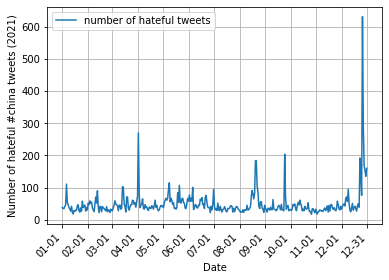

In [122]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets, label = 'number of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=1000, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

# plt.title('-')
plt.grid()
plt.legend()
plt.savefig('hateline_2021.png')
plt.show()

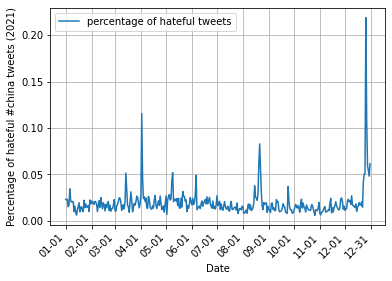

In [123]:
# get percentage of hateful tweets per day in 2021
import numpy as np
percentage_hate = np.array(num_hate_tweets)/np.array(num_tweets)

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(percentage_hate, label = 'percentage of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Percentage of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=0.13, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

# plt.title('-')
plt.grid()
plt.legend()
plt.savefig('percentage_hateline_2021.png')
plt.show()

### Number/percentage of (non-/hateful) \#china tweets per day in the year of 2021 (COVID-BERT)

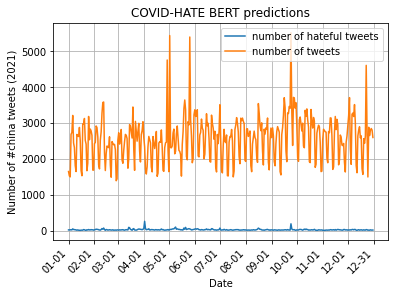

In [118]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_COVID_BERT, label = 'number of hateful tweets')
ax.plot(num_tweets, label = 'number of tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of #china tweets (2021)')

# # annotate
# ax.annotate('Chinese Virus tweet', (31+28+20, num_tweets[31+28+20]), xytext=(-20,20), textcoords='offset points', ha='center', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                             color='red'))

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=17500, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('COVID-HATE BERT predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('doubleline.png')

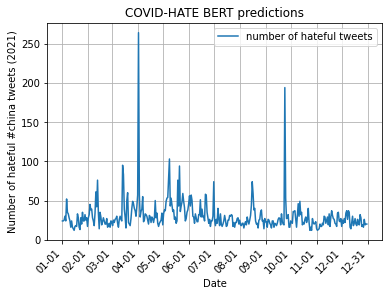

In [106]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_COVID_BERT, label = 'number of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=1000, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('COVID-HATE BERT predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('hateline.png')

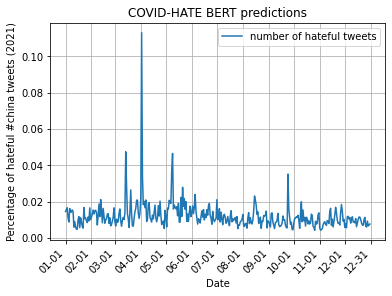

In [107]:
# get percentage of hateful tweets per day in 2021
percentage_hate_BERT = np.array(num_hate_tweets_COVID_BERT)/np.array(num_tweets)

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(percentage_hate_BERT, label = 'number of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Percentage of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=0.13, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('COVID-HATE BERT predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('percentage_hateline.png')

### Number/percentage of (non-/hateful) \#china tweets per day in the year of 2021 (CardiffNLP-RoBERTa)

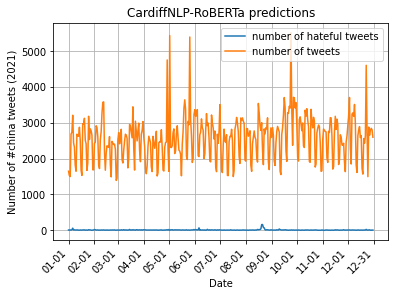

In [119]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_CARDIFFNLP_ROBERTA, label = 'number of hateful tweets')
ax.plot(num_tweets, label = 'number of tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of #china tweets (2021)')

# # annotate
# ax.annotate('Chinese Virus tweet', (31+28+20, num_tweets[31+28+20]), xytext=(-20,20), textcoords='offset points', ha='center', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                             color='red'))

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=17500, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('CardiffNLP-RoBERTa predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('doubleline.png')

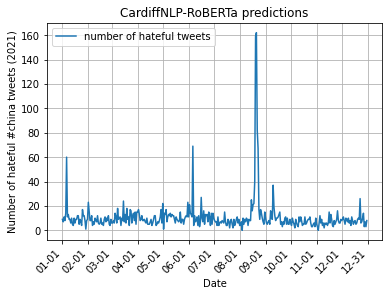

In [109]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_CARDIFFNLP_ROBERTA, label = 'number of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=130, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('CardiffNLP-RoBERTa predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('hateline.png')

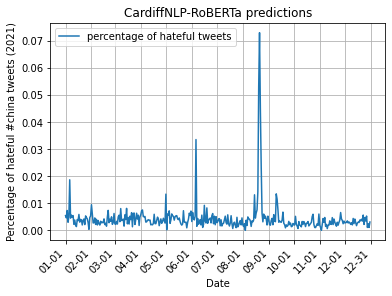

In [110]:
# get percentage of hateful tweets per day in 2020
percentage_hate_BERT = np.array(num_hate_tweets_CARDIFFNLP_ROBERTA)/np.array(num_tweets)

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(percentage_hate_BERT, label = 'percentage of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Percentage of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=0.04, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('CardiffNLP-RoBERTa predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('percentage_hateline.png')

### Number/percentage of (non-/hateful) \#china tweets per day in the year of 2021 (HateXplain)

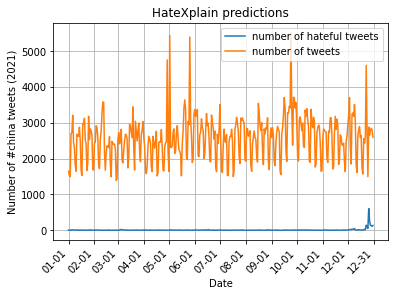

In [120]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_HATEXPLAIN, label = 'number of hateful tweets')
ax.plot(num_tweets, label = 'number of tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of #china tweets (2021)')

# # annotate
# ax.annotate('Chinese Virus tweet', (31+28+20, num_tweets[31+28+20]), xytext=(-20,20), textcoords='offset points', ha='center', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                             color='red'))

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=17500, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('HateXplain predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('doubleline.png')

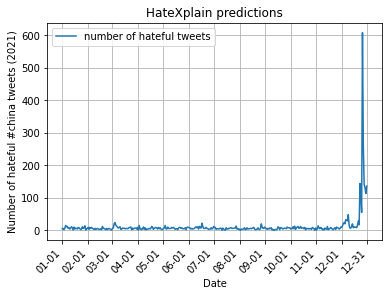

In [112]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_HATEXPLAIN, label = 'number of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=120, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('HateXplain predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('hateline.png')

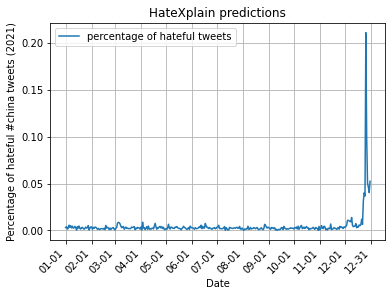

In [113]:
# get percentage of hateful tweets per day in 2021
percentage_hate_hateXplain = np.array(num_hate_tweets_HATEXPLAIN)/np.array(num_tweets)

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(percentage_hate_hateXplain, label = 'percentage of hateful tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Percentage of hateful #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=0.02, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('HateXplain predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('percentage_hateline.png')

### Number/percentage of (non-/offensive) \#china tweets per day in the year of 2021 (HateXplain)

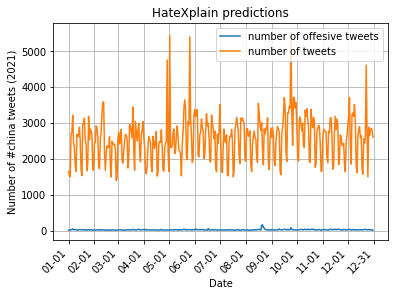

In [121]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_HATEXPLAIN_OFFENSE, label = 'number of offesive tweets')
ax.plot(num_tweets, label = 'number of tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of #china tweets (2021)')

# # annotate
# ax.annotate('Chinese Virus tweet', (31+28+20, num_tweets[31+28+20]), xytext=(-20,20), textcoords='offset points', ha='center', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
#             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                             color='red'))

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=17500, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('HateXplain predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('doubleline.png')

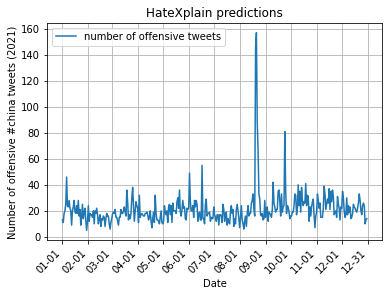

In [115]:
fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_HATEXPLAIN_OFFENSE, label = 'number of offensive tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Number of offensive #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=120, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('HateXplain predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('hateline.png')

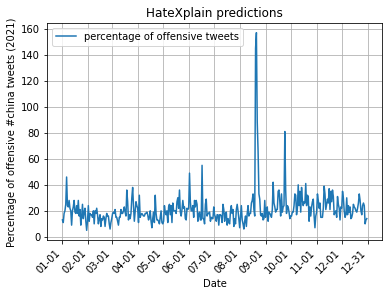

In [116]:
# get percentage of hateful tweets per day in 2021
percentage_hate_hateXplain = np.array(num_hate_tweets_HATEXPLAIN)/np.array(num_tweets)

fig, ax = plt.subplots()
plt.xticks(rotation=45, ha='right')
ax.plot(num_hate_tweets_HATEXPLAIN_OFFENSE, label = 'percentage of offensive tweets')
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xlabel('Date')
plt.ylabel('Percentage of offensive #china tweets (2021)')

# # single vline with full ymin and ymax
# plt.vlines(x=31+28+20, ymin=0, ymax=0.02, colors='green', ls=':', lw=2, label='Chinese Virus tweet')

plt.title('HateXplain predictions')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('percentage_hateline.png')